In [1]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
beer_df = pd.read_csv("Resources/clean_beer_data_try2.csv")
beer_df.head()

,index,beer_name,brewery_name,beer_style,country,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_review_count,brewery_review,brewery_review_count,lat,lng,beer_id,brewery_id
0,0,(512) IPA,(512) Brewing Company,American IPA,United States,7.0,4.259259,4.129630,4.009259,4.101852,4.185185,54,4.22,135,30.222972,-97.770152,43535,17863
1,1,(512) Pecan Porter,(512) Brewing Company,American Porter,United States,6.8,4.185185,4.067901,4.166667,3.981481,4.166667,81,4.22,135,30.222972,-97.770152,45617,17863
2,2,Hell Or High Watermelon Wheat Beer,21st Amendment Brewery,Fruit / Vegetable Beer,United States,4.9,3.388771,3.116525,3.237288,3.325212,3.237288,472,3.71,2767,37.782525,-122.392460,4202,735
3,3,21st Amendment IPA,21st Amendment Brewery,American IPA,United States,7.0,3.890769,3.801538,3.977692,3.771538,3.767692,650,3.71,2767,37.782525,-122.392460,20781,735
4,4,Bitter American,21st Amendment Brewery,American Pale Ale (APA),United States,4.4,4.118421,3.921053,3.927632,3.769737,3.898026,152,3.71,2767,37.782525,-122.392460,34791,735


In [3]:
#Find top 5 most common beer styles
style_count=beer_df["beer_style"].value_counts()
style_count

American IPA                        275
American Double / Imperial IPA      216
American Pale Ale (APA)             189
American Porter                     143
American Double / Imperial Stout    128
                                   ... 
Lambic - Unblended                    2
Gose                                  2
English Pale Mild Ale                 2
Faro                                  2
Roggenbier                            1
Name: beer_style, Length: 101, dtype: int64

In [4]:
IPA_df=beer_df.loc[(beer_df["beer_style"]=="American IPA"),["beer_style","review_overall"]]
DoubIPA_df=beer_df.loc[(beer_df["beer_style"]=="American Double / Imperial IPA"),["beer_style","review_overall"]]
APA_df=beer_df.loc[(beer_df["beer_style"]=="American Pale Ale (APA)"),["beer_style","review_overall"]]
Port_df=beer_df.loc[(beer_df["beer_style"]=="American Porter"),["beer_style","review_overall"]]
ImpSt_df=beer_df.loc[(beer_df["beer_style"]=="American Double / Imperial Stout"),["beer_style","review_overall"]]
common_beer_df=IPA_df
common_beer_df=common_beer_df.append([DoubIPA_df,APA_df,Port_df,ImpSt_df])
common_beer_df

,beer_style,review_overall
0,American IPA,4.259259
3,American IPA,3.890769
30,American IPA,3.600216
45,American IPA,3.767273
58,American IPA,3.890625
...,...,...
4160,American Double / Imperial Stout,3.863636
4161,American Double / Imperial Stout,4.131988
4212,American Double / Imperial Stout,3.767782
4219,American Double / Imperial Stout,3.702222


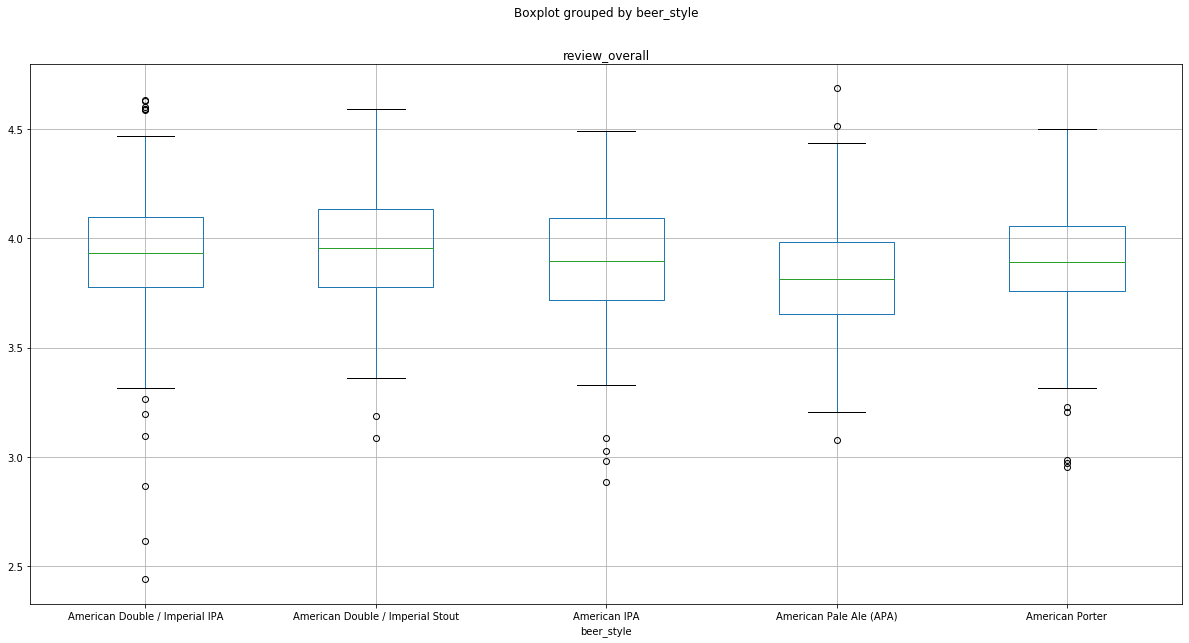

In [7]:
common_beer_df.boxplot("review_overall", by="beer_style",figsize=(20,10))
plt.savefig(f"Images/BeerBox.png")

In [ ]:
stats.f_oneway(IPA_df["review_overall"],DoubIPA_df["review_overall"],APA_df["review_overall"],Port_df["review_overall"],ImpSt_df["review_overall"])